In [339]:
#importing libraries

In [340]:
import pandas as pd

In [341]:
import seaborn as sns

In [342]:
car_df = pd.read_csv(r"C:\Users\Prof Guru Joe\Desktop\car.csv")

In [343]:
car_df.head() #view the nature of car dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [344]:
#to know the number of features
car_df.shape

(301, 9)

In [345]:
#there are 301 rows and 9 features in my car dataset

In [346]:
print(car_df['Seller_Type'].unique()) 
print(car_df['Transmission'].unique())
print(car_df['Owner'].unique())
print(car_df['Fuel_Type'].unique())#printing all the unique values of the categorical features

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [347]:
# there are just two unique values in Seller_Type and Transmission i.e Dealer and Individual, Manual and Automatic resp.

In [348]:
#check for null values in the car dataset
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [349]:
#there are no missing values in the dataset

In [350]:
#to know the detailed descriptive statistics
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [351]:
#selling price ranges btw $35k max as at 2018 and $0.1K min as at 2003. the average price is $4.661296k

In [352]:
car_df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

<AxesSubplot:>

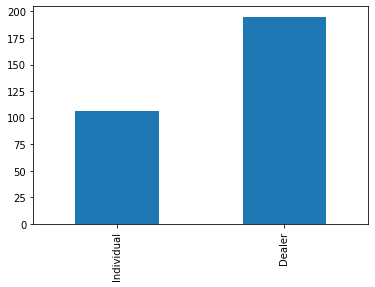

In [353]:
car_df['Seller_Type'].value_counts().sort_index(ascending=False).plot(kind='bar')

<AxesSubplot:>

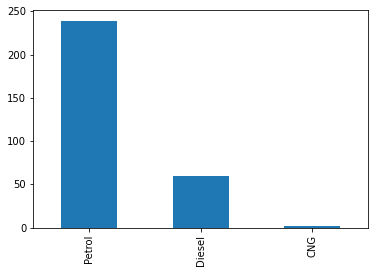

In [354]:
car_df['Fuel_Type'].value_counts().sort_index(ascending=False).plot(kind='bar')

In [355]:
main_dataset = car_df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
#the required features in the model

In [356]:
main_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [357]:
main_dataset['Current_Year'] = 2022 #creating the current year in order to get no. of years a car has been used

In [358]:
main_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [359]:
main_dataset['Num_Years'] = main_dataset['Current_Year'] - main_dataset['Year'] 
#number of years the car has been used = current year - years. this is an important feature for our prediction, 
#because cars depreciates with usage

In [360]:
main_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Num_Years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [361]:
main_dataset.drop(['Year'], axis=1,inplace=True)

In [362]:
main_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Num_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [363]:
main_dataset.drop(['Current_Year'], axis=1,inplace=True)

In [364]:
main_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Num_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [365]:
main_dataset = pd.get_dummies(main_dataset,drop_first=True)

In [366]:
main_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [367]:
main_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Num_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [368]:
#visualizing the correlation as heatmap
import matplotlib.pyplot as plt
%matplotlib inline

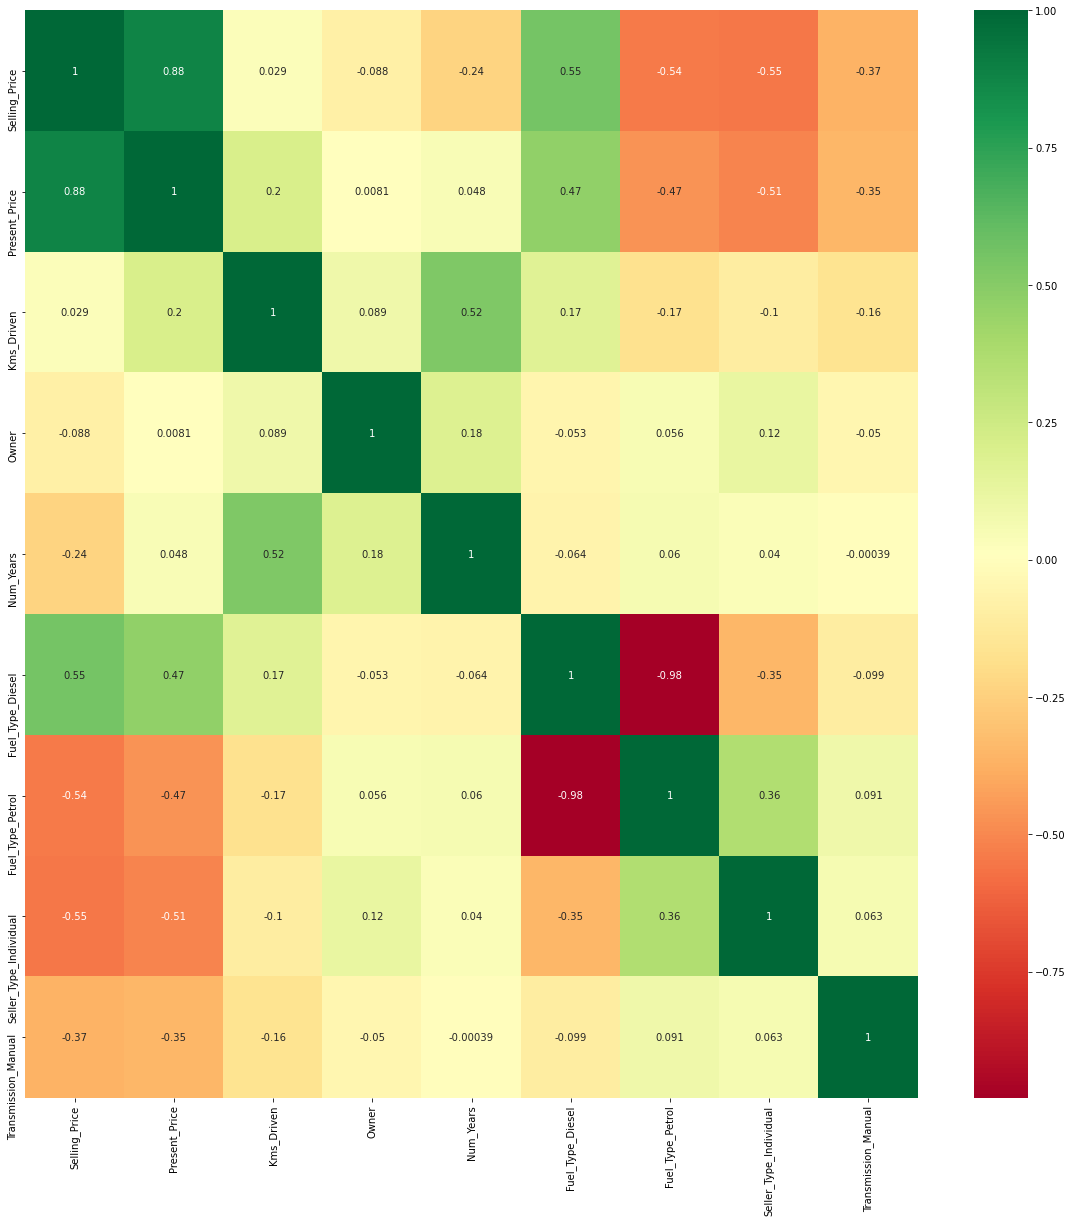

In [369]:
correl = main_dataset.corr()
corr_features = correl.index
plt.figure(figsize=(20,20))
#heatmap plot
p=sns.heatmap(main_dataset[corr_features].corr(),annot=True,cmap="RdYlGn")

In [370]:
#the present price and selling price are highly positively correlated, fuel type diesel and fuel type petrol are negatively
#correlated,seller type individual and transmission type manual have weak positive correlation

In [371]:
X = main_dataset.iloc[:,1:] # all the features in the dataset are independent variables except Selling price
y = main_dataset.iloc[:,0] #this selects the Selling price as the dependent variable

In [372]:
#view my dependent variable
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [373]:
#viewing my independent variable
X.head()

,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [374]:
#to know the importance of each of the independent features based on level of correlation
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor() #intializing the model
model.fit(X,y)

ExtraTreesRegressor()

In [375]:
print(model.feature_importances_)

[0.39272193 0.03996359 0.00117302 0.07694441 0.22074122 0.01110023
 0.11784935 0.13950625]


In [376]:
#present price has highest feature importance followed by, fuel type diesel, then transmission manual and etc.

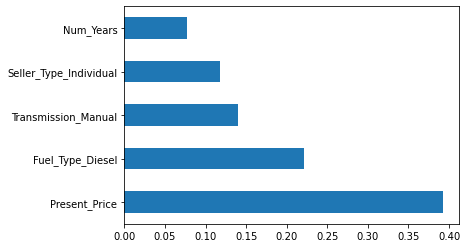

In [377]:
#displaying the 5 most important features in a bar chart
importances = pd.Series(model.feature_importances_,index=X.columns)
importances.nlargest(5).plot(kind='barh')
plt.show()

In [378]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [379]:
X_train

,Present_Price,Kms_Driven,Owner,Num_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
288,13.60,34000,0,7,0,1,0,1
214,5.70,20114,0,5,0,1,0,1
235,9.40,15141,0,5,0,1,0,1
73,5.71,43000,0,11,0,1,0,1
125,1.75,40000,0,13,0,1,1,1
...,...,...,...,...,...,...,...,...
99,20.45,50024,0,12,1,0,0,1
286,7.90,28569,0,6,0,1,0,1
94,22.78,89000,0,14,0,1,0,0
160,0.95,24000,0,11,0,1,1,1


In [380]:
X_train.shape

(240, 8)

In [381]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [382]:
#hyper parameters and selecting decision trees
import numpy as np
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [383]:
#randomized search cv
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#nos. of features to consider at every split
max_features = ['auto', 'sqrt']
#max nos. of levels in tree
max_depth = [int(x) for x in np.linspace(6,30,num=6)]
#min nos. of samples required to split a node
min_samples_split = [2,5,10,15,100]
#min nos. of required at each leaf node
min_samples_leaf = [1,2,5,10]

In [384]:
#to find the best estimated parameters
from sklearn.model_selection import RandomizedSearchCV

In [385]:
#create random grid to see the various parameters that has been taken
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
              'max_depth':max_depth,
             'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [6, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [386]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [387]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [397]:
#predictions
y_pred = rf_random.predict(X_test)
y_pred

array([ 0.57984,  4.09811,  4.95587,  5.6696 ,  6.34627,  0.59867,
        3.25438,  0.58288,  8.6981 ,  0.56442,  0.60875, 11.62508,
        2.91599,  0.73328,  8.51799,  8.33353, 10.1216 ,  0.62852,
        9.52429,  6.44324,  2.79868,  3.39208,  1.16041,  5.82134,
       20.35397,  1.03057,  0.52282,  0.90497,  4.91245,  0.56738,
       15.83795,  7.5671 ,  2.84355,  2.12203,  1.02958,  0.57804,
        2.61374,  3.98923,  3.04846,  7.16555,  4.72813,  7.51695,
        4.5531 ,  4.49265,  5.39895,  0.84303,  0.9159 ,  0.98879,
        6.41662,  3.52945,  5.40943,  5.47787,  8.08834, 10.93293,
        0.45855,  2.34894,  6.53278,  3.92535,  5.8615 ,  6.10756,
        4.32195])

In [400]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
1.0


In [401]:
import warnings

In [402]:
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

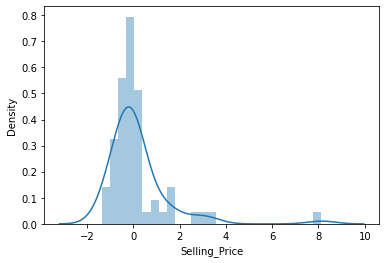

In [403]:
sns.distplot(y_test-predictions) #y_test is actual value 

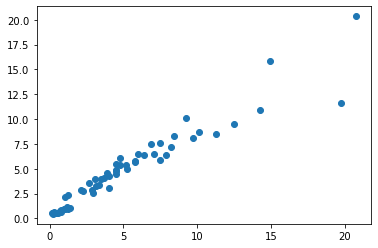

In [404]:
plt.scatter(y_test,predictions)

In [405]:
#a good model y_test minus predictions gave a minimum and our scatter plot is linearly okay

In [406]:
import pickle

In [407]:
#to store the data in a file
file=open('random_forest_regression_model.pkl','wb')
#store info to the file
pickle.dump(rf_random,file)